# T5 fine-tuning for Generated Text Detection

## Data preparation

In [1]:
import pandas as pd

In [2]:
train_init_df = pd.read_csv('train.csv', sep=';', encoding='utf-8')

In [3]:
val_init_df = pd.read_csv('validation.csv', sep=';', encoding='utf-8')

In [4]:
test_init_df = pd.read_csv('test.csv', sep=';', encoding='utf-8')

In [5]:
def convert_df_to_req_format_T5(df):
    df = df[['text', 'account.type']]
    df = df.rename(columns={'account.type': 'label'})
    return df

In [6]:
train_T5_df = convert_df_to_req_format_T5(train_init_df)

In [7]:
val_T5_df = convert_df_to_req_format_T5(val_init_df)
test_T5_df = convert_df_to_req_format_T5(test_init_df)

In [8]:
train_T5_df.to_csv('train_T5.csv', index=False)
val_T5_df.to_csv('val_T5.csv', index=False)
test_T5_df.to_csv('test_T5.csv', index=False)

## Installations

In [9]:
!pip install transformers
!pip install datasets
!pip install sacrebleu
!pip install sentencepiece

## Mounting Google Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Fine-tuning T5

In [11]:
!rm -rf /content/detection-ckpts
!python "/content/drive/MyDrive/Colab Notebooks/run_seq2seq.py" --task translation_en_to_en --text_column text --summary_column label --train_file /content/train_T5.csv --validation_file /content/val_T5.csv --do_predict --predict_with_generate --test_file /content/test_T5.csv --save_total_limit 5 --num_train_epochs 3 --output_dir /content/detection-ckpts/ --model_name_or_path t5-base --do_train --do_eval

04/11/2022 07:09:27 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/11/2022 07:09:27 - INFO - __main__ -   Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=True,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
generation_max_length=None,
generation_num_beams=None,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=H

## Evaluation

In [13]:
val_T5_df = pd.read_csv('/content/val_T5.csv', encoding='utf-8')
test_T5_df = pd.read_csv('/content/test_T5.csv', encoding='utf-8')

In [14]:
val_labels = list(val_T5_df['label'])
test_labels = list(test_T5_df['label'])

In [15]:
from sklearn.metrics import f1_score

In [16]:
def compute_F1(path, gold_labels):
  pred_labels = []
  for line in open(path):
    pred_labels.append(line.strip())
  return f1_score(gold_labels, pred_labels, average="micro"), f1_score(gold_labels, pred_labels, average="macro")

In [17]:
!python "/content/drive/MyDrive/Colab Notebooks/run_seq2seq.py" --model_name_or_path /content/detection-ckpts/checkpoint-500 --task translation_en_to_en --text_column text --summary_column label --train_file /content/train_T5.csv --validation_file /content/val_T5.csv --test_file /content/test_T5.csv --do_predict --predict_with_generate --output_dir /content/detection-ckpts --do_eval

04/11/2022 07:19:01 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/11/2022 07:19:01 - INFO - __main__ -   Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=True,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
generation_max_length=None,
generation_num_beams=None,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=

In [18]:
!python "/content/drive/MyDrive/Colab Notebooks/run_seq2seq.py" --model_name_or_path /content/detection-ckpts/checkpoint-1000 --task translation_en_to_en --text_column text --summary_column label --train_file /content/train_T5.csv --validation_file /content/val_T5.csv --test_file /content/test_T5.csv --do_predict --predict_with_generate --output_dir /content/detection-ckpts --do_eval

04/11/2022 07:20:33 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/11/2022 07:20:33 - INFO - __main__ -   Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=True,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
generation_max_length=None,
generation_num_beams=None,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=

In [19]:
!python "/content/drive/MyDrive/Colab Notebooks/run_seq2seq.py" --model_name_or_path /content/detection-ckpts/checkpoint-1500 --task translation_en_to_en --text_column text --summary_column label --train_file /content/train_T5.csv --validation_file /content/val_T5.csv --test_file /content/test_T5.csv --do_predict --predict_with_generate --output_dir /content/detection-ckpts --do_eval

04/11/2022 07:22:05 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/11/2022 07:22:05 - INFO - __main__ -   Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=True,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
generation_max_length=None,
generation_num_beams=None,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=

In [20]:
!python "/content/drive/MyDrive/Colab Notebooks/run_seq2seq.py" --model_name_or_path /content/detection-ckpts/checkpoint-2000 --task translation_en_to_en --text_column text --summary_column label --train_file /content/train_T5.csv --validation_file /content/val_T5.csv --test_file /content/test_T5.csv --do_predict --predict_with_generate --output_dir /content/detection-ckpts --do_eval

04/11/2022 07:23:37 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/11/2022 07:23:37 - INFO - __main__ -   Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=True,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
generation_max_length=None,
generation_num_beams=None,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=

In [21]:
f1_mi_val_500, f1_ma_val_500 = compute_F1('/content/detection-ckpts/checkpoint-500_val_preds_seq2seq.txt', val_labels)
f1_mi_val_1000, f1_ma_val_1000 = compute_F1('/content/detection-ckpts/checkpoint-1000_val_preds_seq2seq.txt', val_labels)
f1_mi_val_1500, f1_ma_val_1500 = compute_F1('/content/detection-ckpts/checkpoint-1500_val_preds_seq2seq.txt', val_labels)
f1_mi_val_2000, f1_ma_val_2000 = compute_F1('/content/detection-ckpts/checkpoint-2000_val_preds_seq2seq.txt', val_labels)

In [22]:
f1_mi_test_2000, f1_ma_test_2000 = compute_F1('/content/detection-ckpts/checkpoint-2000_test_preds_seq2seq.txt', test_labels)

In [23]:
print(f"F1-score (micro): {f1_mi_test_2000}")
print(f"F1-score (macro): {f1_ma_test_2000}")

F1-score (micro): 0.8835027365129007
F1-score (macro): 0.8834845024868778


In [24]:
pred_labels = []
for line in open('/content/detection-ckpts/checkpoint-2000_test_preds_seq2seq.txt'):
  pred_labels.append(line.strip())

In [25]:
dfResults = pd.DataFrame(pred_labels, columns=["prediction"])
dfResults["gold"] = test_T5_df[["label"]]
file_name = "/T5_finetuning.csv"
dfResults.to_csv(file_name, encoding='utf-8')

In [26]:
dfResults.head()

,prediction,gold
0,bot,human
1,human,human
2,bot,human
3,bot,bot
4,human,human


In [27]:
test_init_df['label_T5'] = pred_labels

In [28]:
test_init_df

,screen_name,text,account.type,class_type,label_T5
0,zawvrk,justin timberlake really one of the goats if y...,human,human,bot
1,narendramodi,Thank you @PMBhutan for your gracious prayers ...,human,human,human
2,ahadsheriff,Theory: the number of red lights you will hit ...,human,human,bot
3,AINarendraModi,Respects on the Upt of the I good with the peo...,bot,rnn,bot
4,kevinhooke,Might give the BASIC #10Liner game contest ano...,human,human,human
...,...,...,...,...,...
2553,ahadsheriffbot,“The best kept secret,bot,others,bot
2554,kevinhooke,Love the Choose your own adventure style of th...,human,human,human
2555,dril_gpt2,JOIN OUR TEAM: Sneezing,bot,gpt2,bot
2556,kevinhooke,These deeply discounted 256GB SanDisk flash dr...,human,human,human


In [29]:
def plotErrorRatio(X_test_all, prediction_column, min_sample_num=30):
  X_verify = test_init_df[["screen_name", "text", "account.type", prediction_column]]
  X_count_accounts = test_init_df[["screen_name", "account.type"]].groupby("screen_name").count()
  X_verify = X_verify[X_verify["account.type"] != X_verify[prediction_column]]
  X_verify = X_verify.groupby("screen_name").count()["text"].to_frame()
  X_verify["total"] = X_count_accounts["account.type"]
  X_verify.columns = ["errors", "num_samples"]
  X_verify["error_ratio"] = X_verify["errors"] / X_verify["num_samples"]
  X_verify[X_verify["num_samples"] >= min_sample_num]["error_ratio"].plot.bar(figsize=(15,5))
  return X_verify

,errors,num_samples,error_ratio
screen_name,,,
AINarendraModi,1,125,0.008000
DeepDrumpf,2,29,0.068966
GenePark_GPT2,5,22,0.227273
Gpt2Wint,1,2,0.500000
JustinTrudeau,1,51,0.019608
Musk_from_Mars,1,2,0.500000
Thorin,1,10,0.100000
UtilityLimb,1,4,0.250000
VBoterin,1,13,0.076923


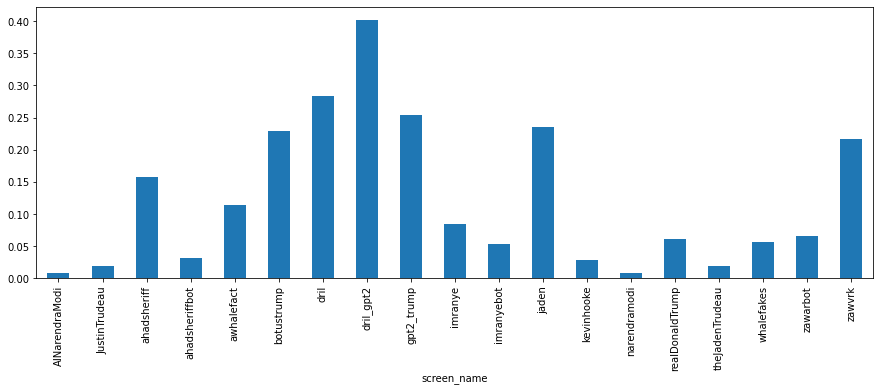

In [30]:
plotErrorRatio(test_init_df, "label_T5")